Méthode LOF

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import scipy.io as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
import xlsxwriter


dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']

calcul_distances=['euclidean','cityblock', 'cosine', 'l1', 'l2', 'manhattan']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
workbook = xlsxwriter.Workbook('Matrice.xlsx')

#range(1,len(X_test),10)

skf= StratifiedKFold(n_splits=2,shuffle=False,random_state=None)
i=0
worksheet = workbook.add_worksheet()
for train_index, test_index in skf.split(X, y):
    matrice=np.array([['n_neighbours'],['distance'],['contamination'],['F1 score'],['recall'],['precision'],['accuracy'],['AUC']])
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for k in range(1,len(X_test),10) :
        for distance in calcul_distances :
            for contam in np.linspace(0.001,0.5,15) :
                LOF = LocalOutlierFactor(n_neighbors=k, algorithm='auto', contamination=contam, metric=distance)
                y_pred = LOF.fit_predict(X_test)
                X_scores = -LOF.negative_outlier_factor_
                y=np.reshape(y,(683,))
                y_pred[y_pred>0]=0
                y_pred[y_pred<0]=1
                F1=round(f1_score(y_test,y_pred),3)
                recall=round(recall_score(y_test,y_pred),3)
                precision=round(precision_score(y_test,y_pred,zero_division=0),3)
                accuracy=round(accuracy_score(y_test,y_pred),3)
                auc=round(roc_auc_score(y_test,X_scores),3)
                matrice = np.append(matrice,np.array([k,distance,round(contam,3),F1,recall,precision,accuracy,auc]).reshape(8,1),axis=1)
    col = 0
    for row, data in enumerate(matrice):
        worksheet.write_row(row+i*10, col, data)
    i=i+1    
workbook.close()


            0          1          2          3          4          5     \
0   n_neighbours          1          1          1          1          1   
1       distance  euclidean  euclidean  euclidean  euclidean  euclidean   
2  contamination      0.001      0.037      0.072      0.108      0.144   
3       F1 score        0.0      0.031      0.031      0.051      0.166   
4         recall        0.0      0.017      0.017      0.033      0.117   
5      precision        0.0        0.2        0.2      0.108      0.286   
6       accuracy      0.646      0.632      0.632      0.564      0.588   
7            AUC      0.601      0.601      0.601      0.601      0.601   

        6          7          8          9     ...       3141       3142  \
0          1          1          1          1  ...        341        341   
1  euclidean  euclidean  euclidean  euclidean  ...  manhattan  manhattan   
2      0.179      0.215       0.25      0.286  ...      0.179      0.215   
3      0.209      0.

Méthode Kmeans

Confusion Matrix:
[[217   5]
 [  7 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       222
           1       0.96      0.94      0.95       120

    accuracy                           0.96       342
   macro avg       0.96      0.96      0.96       342
weighted avg       0.96      0.96      0.96       342

Accuracy : 0.9649122807017544


NameError: name 'X_scores' is not defined

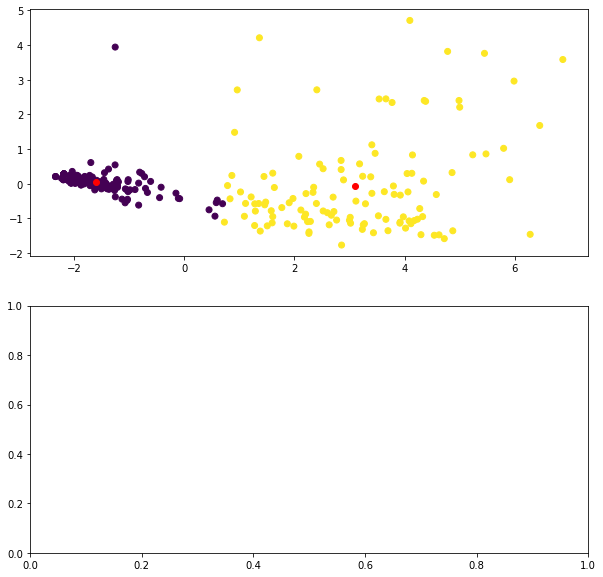

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import scipy.io as sp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
X=StandardScaler().fit_transform(X)
model=PCA(n_components=2)
X=model.fit_transform(X)
#plt.scatter(X[:,0],X[:,1],c=y)

y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_test)
y_pred=kmeans.labels_

#X_scores ??

y_test=np.reshape(y_test,(len(y_test,)))


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

result1 = classification_report(y_test, y_pred)
result2 = accuracy_score(y_test,y_pred)
if result2 < 0.1 :
    result2=1-result2
print("Confusion Matrix:")
print(result)
print("Classification Report:",)
print (result1)
print("Accuracy :",result2)


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.scatter(X_test[:,0], X_test[: , 1], c=kmeans.predict(X_test))
ax1.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='r')

random_probs = [0 for _ in range(len(y_test))]
# calculate AUC
model_auc = roc_auc_score(y_test, X_scores)
# summarize score
print('Model: ROC AUC=%.3f' % (model_auc))
# calculate ROC Curve
    # For the Random Model
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
    # For the actual model
model_fpr, model_tpr, _ = roc_curve(y_test, X_scores)
# Plot the roc curve for the model and the random model line
ax2.plot(random_fpr, random_tpr, linestyle='--', label='Random')
ax2.plot(model_fpr, model_tpr, marker='.', label='Model')
# show the legend
ax2.legend()
# show the plot
plt.show()

"""
inertia = []
K_range = range(1,20)
for k in K_range:
    model = KMeans(n_clusters =k).fit(X)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût du modèle')
"""


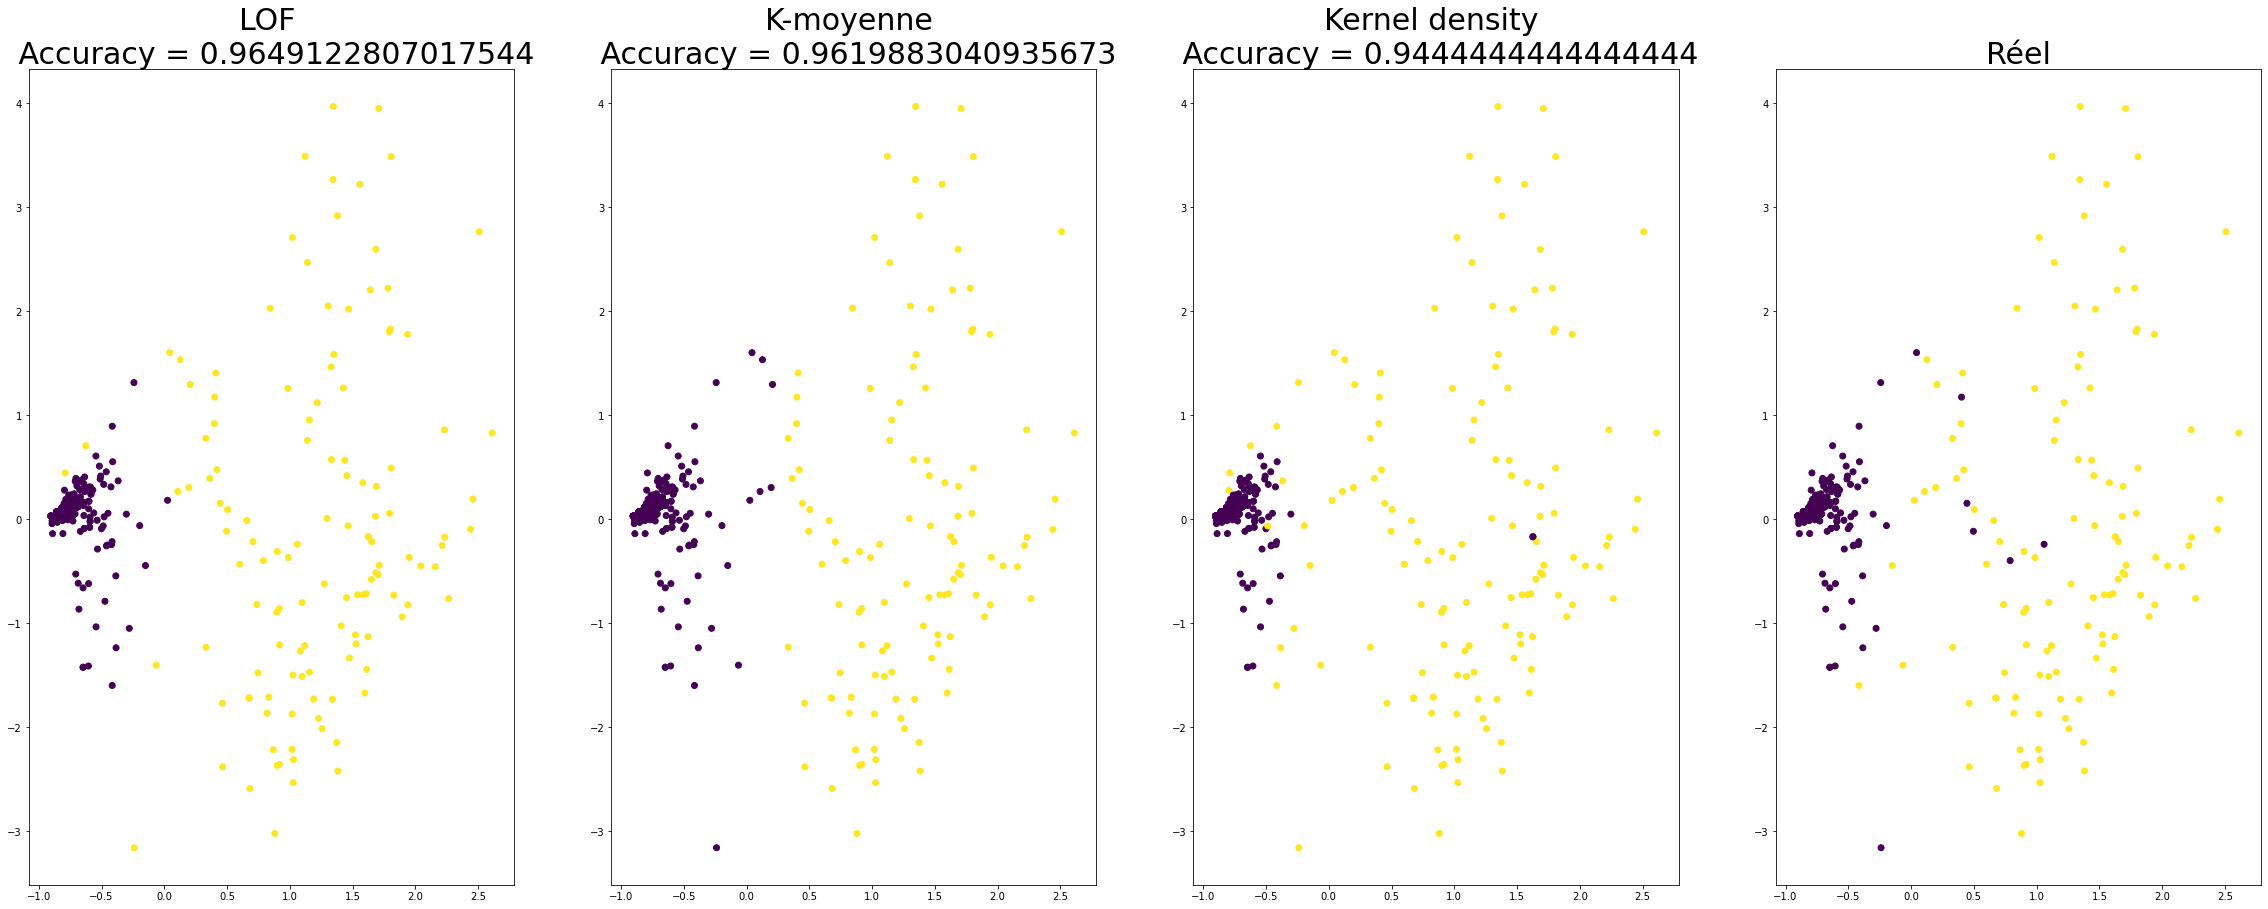

In [4]:
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import scipy.io as sp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
y_test=np.reshape(y_test,(len(y_test),))

model=PCA(n_components=2)
X_2D=X_test
X_2D=model.fit_transform(X_2D)
X_2D=StandardScaler().fit_transform(X_2D)

kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(X_test)
X_scores=kde.score_samples(X_test)
y_pred_kde=X_scores
y_pred_kde[y_pred_kde>-14]=0
y_pred_kde[y_pred_kde<-14]=1

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_test)
y_pred_kmeans=kmeans.labels_

clf = LocalOutlierFactor(n_neighbors=200, algorithm='auto', contamination='auto', metric='euclidean')
y_pred_LOF = clf.fit_predict(X_test)
y_pred_LOF[y_pred_LOF>0]=0
y_pred_LOF[y_pred_LOF<0]=1

result_LOF = accuracy_score(y_test,y_pred_LOF)
result_kmeans = accuracy_score(y_test,y_pred_kmeans)
if result_kmeans < 0.1 :
    result_kmeans=1-result_kmeans
result_kde = accuracy_score(y_test,y_pred_kde)


plt.figure(figsize = (40, 15))
plt.subplot(1,4,1)
plt.scatter(X_2D[:,0],X_2D[:,1],c=y_pred_LOF)
plt.title("LOF \n Accuracy = {}".format(result_LOF), size=30)
plt.subplot(1,4,2)
plt.scatter(X_2D[:,0],X_2D[:,1],c=y_pred_kmeans)
plt.title("K-moyenne \n Accuracy = {}".format(result_kmeans), size=30)
plt.subplot(1,4,3)
plt.scatter(X_2D[:,0],X_2D[:,1],c=y_pred_kde)
plt.title("Kernel density \n Accuracy = {}".format(result_kde), size=30)
plt.subplot(1,4,4)
plt.scatter(X_2D[:,0],X_2D[:,1],c=y_test)
plt.title("Réel",size=30)
plt.show()


Confusion Matrix:
[[215   7]
 [  2 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       222
           1       0.94      0.98      0.96       120

    accuracy                           0.97       342
   macro avg       0.97      0.98      0.97       342
weighted avg       0.97      0.97      0.97       342

Accuracy : 0.9736842105263158
Model: ROC AUC=0.988


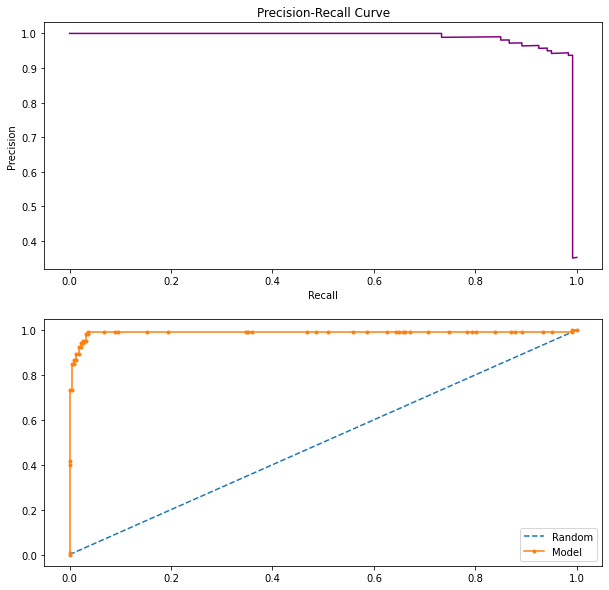

"\nskf= StratifiedKFold(n_splits=5,shuffle=True,random_state=None)\ni=1\nfor train_index, test_index in skf.split(X, y):\n    X_train, X_test = X[train_index], X[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n    model_auc = roc_auc_score(y_test, X_scores)\n    # summarize score\n    print('Model: ROC AUC=%.3f' % (model_auc))\n    model_fpr, model_tpr, _ = roc_curve(y_test, X_scores)\n    # Plot the roc curve for the model and the random model line\n    plt.plot(model_fpr, model_tpr, marker='.', label='Split {}'.format(i))\n    i=i+1\nrandom_probs = [0 for _ in range(len(y_test))]\nrandom_fpr, random_tpr, _ = roc_curve(y_test, random_probs)\nplt.plot(random_fpr, random_tpr, linestyle='--', label='Random')\nplt.legend()\nplt.show()\n"

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import scipy.io as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score, confusion_matrix, classification_report
import xlsxwriter
from sklearn.metrics import precision_recall_curve

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

clf = LocalOutlierFactor(n_neighbors=round(len(X_test)*0.625), algorithm='auto', contamination=0.365, metric='cityblock')
y_pred=clf.fit_predict(X_test)

y_pred = clf.fit_predict(X_test)
X_scores = -clf.negative_outlier_factor_

y=np.reshape(y,(683,))
y_pred[y_pred>0]=0
y_pred[y_pred<0]=1

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy :",result2)


precision, recall, thresholds = precision_recall_curve(y_test,X_scores)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(recall, precision, color='purple')
ax1.set_title('Precision-Recall Curve')
ax1.set_ylabel('Precision')
ax1.set_xlabel('Recall')

random_probs = [0 for _ in range(len(y_test))]
# calculate AUC
model_auc = roc_auc_score(y_test, X_scores)
# summarize score
print('Model: ROC AUC=%.3f' % (model_auc))
# calculate ROC Curve
    # For the Random Model
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
    # For the actual model
model_fpr, model_tpr, _ = roc_curve(y_test, X_scores)
# Plot the roc curve for the model and the random model line
ax2.plot(random_fpr, random_tpr, linestyle='--', label='Random')
ax2.plot(model_fpr, model_tpr, marker='.', label='Model')
# show the legend
ax2.legend()
# show the plot
plt.show()
#print(model_fpr)
#print(model_tpr)
#print(_)

"""
skf= StratifiedKFold(n_splits=5,shuffle=True,random_state=None)
i=1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_auc = roc_auc_score(y_test, X_scores)
    # summarize score
    print('Model: ROC AUC=%.3f' % (model_auc))
    model_fpr, model_tpr, _ = roc_curve(y_test, X_scores)
    # Plot the roc curve for the model and the random model line
    plt.plot(model_fpr, model_tpr, marker='.', label='Split {}'.format(i))
    i=i+1
random_probs = [0 for _ in range(len(y_test))]
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
plt.legend()
plt.show()
"""

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import scipy.io as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']

calcul_distances=['euclidean','cityblock', 'cosine', 'l1', 'l2', 'manhattan']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

#range(1,len(X_test),10)

skf= StratifiedKFold(n_splits=2,shuffle=False,random_state=None)
i=0
for train_index, test_index in skf.split(X, y):
    test =False
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for k in range(1,len(X_test),5) :
        for distance in calcul_distances :
            for contam in np.linspace(0.001,0.5,50) :
                LOF = LocalOutlierFactor(n_neighbors=k, algorithm='auto', contamination=contam, metric=distance)
                y_pred = LOF.fit_predict(X_test)
                X_scores = -LOF.negative_outlier_factor_
                y=np.reshape(y,(683,))
                y_pred[y_pred>0]=0
                y_pred[y_pred<0]=1
                F1=round(f1_score(y_test,y_pred),3)
                recall=round(recall_score(y_test,y_pred),3)
                precision=round(precision_score(y_test,y_pred,zero_division=0),3)
                accuracy=round(accuracy_score(y_test,y_pred),3)
                auc=round(roc_auc_score(y_test,X_scores),3)
                if test == False :
                    matrice = np.array([['[{},{},{}]'.format(k,distance,round(contam,3)),F1,recall,precision,accuracy,auc]])
                    test = True
                else :
                    matrice = np.append(matrice,np.array(['[{},{},{}]'.format(k,distance,round(contam,3)),F1,recall,precision,accuracy,auc]).reshape(1,6),axis=0)
    if i == 0 : 
        df1=pd.DataFrame(matrice,columns=['Combinaison','F1 score','Recall','Precision','Accuracy','AUC'])
    else :
        df2=pd.DataFrame(matrice,columns=['Combinaison','F1 score','Recall','Precision','Accuracy','AUC'])
    i=i+1    
df1 = df1.astype({'F1 score': float, 'Recall': float,'Precision': float,'Accuracy': float,'AUC': float})
df2 = df2.astype({'F1 score': float, 'Recall': float,'Precision': float,'Accuracy': float,'AUC': float})
filtered_values_1 = np.where((df1['F1 score']>=0.93) & (df1['Recall']>=0.925) & (df1['Precision']>=0.925) & (df1['AUC']>=0.925))
filtered_values_2 = np.where((df2['F1 score']>=0.97) & (df2['Recall']>=0.97) & (df2['Precision']>=0.965) & (df2['AUC']>=0.965))
display(df1.loc[filtered_values_1].sort_values(by=['AUC'], ascending=False))
display(df2.loc[filtered_values_2].sort_values(by=['AUC'], ascending=False)) 

,Combinaison,F1 score,Recall,Precision,Accuracy,AUC
12585,"[206,manhattan,0.357]",0.934,0.942,0.926,0.953,0.992
12485,"[206,l1,0.357]",0.934,0.942,0.926,0.953,0.992
12385,"[206,cityblock,0.357]",0.934,0.942,0.926,0.953,0.992
12285,"[201,manhattan,0.357]",0.934,0.942,0.926,0.953,0.992
12185,"[201,l1,0.357]",0.934,0.942,0.926,0.953,0.992
12085,"[201,cityblock,0.357]",0.934,0.942,0.926,0.953,0.992
11985,"[196,manhattan,0.357]",0.934,0.942,0.926,0.953,0.991
11885,"[196,l1,0.357]",0.934,0.942,0.926,0.953,0.991
11785,"[196,cityblock,0.357]",0.934,0.942,0.926,0.953,0.991
12035,"[201,euclidean,0.357]",0.934,0.942,0.926,0.953,0.990


,Combinaison,F1 score,Recall,Precision,Accuracy,AUC
12634,"[211,euclidean,0.347]",0.975,0.975,0.975,0.982,0.998
12834,"[211,l2,0.347]",0.975,0.975,0.975,0.982,0.998
12334,"[206,euclidean,0.347]",0.975,0.975,0.975,0.982,0.997
12534,"[206,l2,0.347]",0.975,0.975,0.975,0.982,0.997
12034,"[201,euclidean,0.347]",0.975,0.975,0.975,0.982,0.996
12234,"[201,l2,0.347]",0.975,0.975,0.975,0.982,0.996
12934,"[216,euclidean,0.347]",0.975,0.975,0.975,0.982,0.996
13134,"[216,l2,0.347]",0.975,0.975,0.975,0.982,0.996
11734,"[196,euclidean,0.347]",0.975,0.975,0.975,0.982,0.994
11934,"[196,l2,0.347]",0.975,0.975,0.975,0.982,0.994
